# Adaptive Filtering of Noisy Signal using Adaline Neural Network TD1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from IPython import display
import keras
from keras import models
from keras import layers
from keras import optimizers
import sklearn    

Using TensorFlow backend.


1. Loading data from text file

In [2]:
S = np.loadtxt('Data_EEG.txt', skiprows=1, unpack=True)
S_sqr=np.square(S)
Mean_S_sqr=np.mean(S_sqr)
print(Mean_S_sqr)

0.012622176222222224


2. Display Orginal signal and Noisy signal  
 The contaminating/perturbating signal m(k) is a 60-Hz modulated signal from original signal v(k) and
 sampled at a frequency of 180-Hz. 
 
 Orginal signal is equal to 
 $v[k] = 1.2 sin(2pik/3)$
 and for noise signal by a factor of 10 and shifted in phase by $pi/2$ is equal to 
 $m[k] = 0.12 sin(2Pik/3 + 2pi/2)$ .
 
 then the noisy signal t(k) is given by : $t(k) = s(k) + m(k)$
 

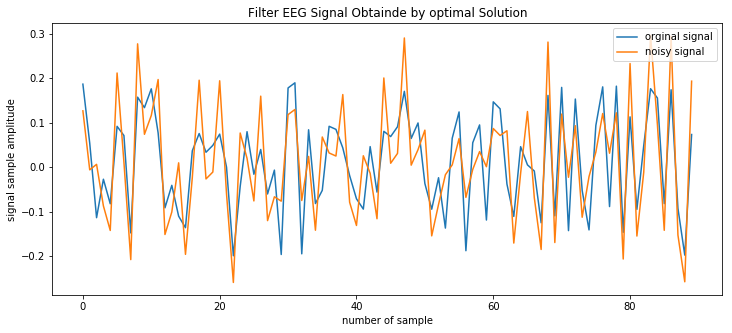

In [3]:
v=[]
m=[]
for i in range(30):
    v=np.concatenate((v,[1.2*np.sin(2*np.pi*(1/3)),
                         1.2*np.sin(2*np.pi*(2/3)),
                         1.2*np.sin(2*np.pi*(3/3))]))
    
    m=np.concatenate((m,[0.12*np.sin((2*np.pi*(1/3))+np.pi/2),
                         0.12*np.sin((2*np.pi*(2/3))+np.pi/2),
                         0.12*np.sin((2*np.pi*(3/3))+np.pi/2)]))
t =S+m
plt.figure(1,figsize=(12,5))
plt.plot(S)
plt.plot(t)
plt.legend(('orginal signal','noisy signal'),loc='upper right')
plt.title('Filter EEG Signal Obtainde by optimal Solution')
plt.xlabel('number of sample')
plt.ylabel('signal sample amplitude')
plt.show()

# Second Order Filter Design:  Optimal Solution_
3. Apply 2Order filter 
    It obtained by least mean square(MSE) 
    between the unfiltered signal and output of second order filter.

    First we compute the input correlation matrix $R=E[zz^T]$  by covariance input data.

    Second the input/target cross-correlation vector $h=E[tz]$ .

    Third we compute the weight matrix given by $w=R^{-1}h$.

    Fourth we compute the second filter by $a(k)=w_{11}v(k)+w_{12}v(k-1)$

    Fifth we compute the $Min_{(w_{11},w_{12})}\frac{1}{n}\|\sum_1^n(T(k)-a(k))\|$, where $n=dim(T)$
    
    **Result: you could see the filtered signal is more close to original signal**


In [4]:
case = '2order'

[-0.03931743 -0.09834269]


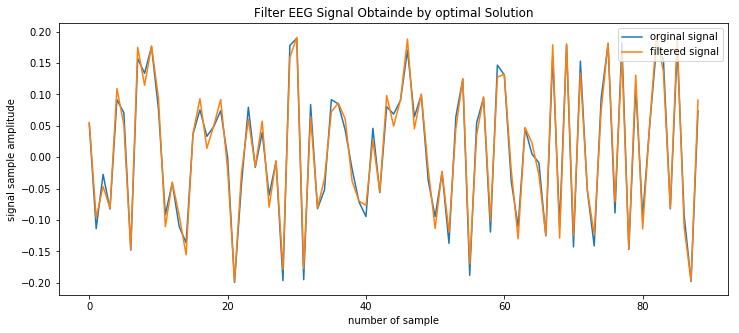

In [5]:
if case =='2order':
    Filter_order =2
    n=len(t)-1
    w=np.array([0,0])             #initail value of weight
    b=0                           #initail value of based value
    a=np.zeros(len(t)-1);         #initail value of adaliner network output
    V=np.array([v[1:90],v[0:89]]) #input signal
    T=t[1:90]                     #target signal
    Cov_R = np.cov(v[1:90],v[0:89])
    Cov_h = np.dot(V,T.T)/len(t[1:])
    w1= np.dot(inv(Cov_R),Cov_h.T)
    print(w1)
    a1=np.dot(w1.T,V)
    e1=T-a1 # Initial filtered signal values
    plt.figure(2,figsize=(12,5))
    plt.plot(S[1:90])
    plt.plot(e1)
    plt.legend(('orginal signal','filtered signal'),loc='upper right')
    plt.title('Filter EEG Signal Obtainde by optimal Solution')
    plt.xlabel('number of sample')
    plt.ylabel('signal sample amplitude')
    plt.show()

# Second Order Filter Design: ADALINE Design Based on Iterative Solution 
4. The optimal solution is obtained by minimizing least mean square (LMS) between the unfiletered signal $T(k)$ considered as target signal and the output of ADALINE network given by $a(k)=w_{11}v(k)+w_{12}v(k-1)$. 

In case where we have multiple outputs, and therefore multiple neurons, to update the ith row of the weight matrix we use the update rule:
\begin{eqnarray}
w_i(k+1)&=&w_i(k)+2 \alpha e(k)V^T(k) \nonumber \\
b_i(k+1)&=&b_i(k)+2\alpha e(k)  \nonumber
\end{eqnarray}

**we do not have baised value**

In [6]:
    N=1000
    alpha=0.001
    J=[]
    e=T-a
    # Iterative Solution
    for i in range(N):
        j=np.random.randint(1,n)
        J=np.concatenate((J,[j]))
        w=w+2*alpha*e[j]*V[:,j]
        a=np.transpose(w).dot(V)
        e=T-a
    print(w)    
    plt.figure(3,figsize=(12,5))
    plt.plot(S[1:90])
    plt.plot(e)
    plt.legend(('original signal','filtered signal'),loc='upper left')
    plt.title('Second rder Filtered ECG Signal obtained by Gradient-Based Solution')
    plt.xlabel('number of samples')
    plt.ylabel('signal samples amplitude')
    plt.show()


"for i in range(N):\n    j=np.random.randint(1,n)\n    J=np.concatenate((J,[j]))\n    w=w+2*alpha*e[j]*V[:,j]\n    a=np.transpose(w).dot(V)\n    e=T-a\nprint(w)    \nplt.figure(3,figsize=(12,5))\nplt.plot(S[1:90])\nplt.plot(e)\nplt.legend(('original signal','filtered signal'),loc='upper left')\nplt.title('Second rder Filtered ECG Signal obtained by Gradient-Based Solution')\nplt.xlabel('number of samples')\nplt.ylabel('signal samples amplitude')\nplt.show()"

# Third Order Filter Design: ADALINE Design based on Iterative Solution 
5. The optimal solution is obtained by minimizing least mean square (LMS) between the unfiletered signal $T(k)$ considered as target signal and the output of ADALINE network given by $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$.

**Result: the filtered signal is more close to the orginal singal regards to second order filter**

[ 0.00814258 -0.05496158  0.04681899]


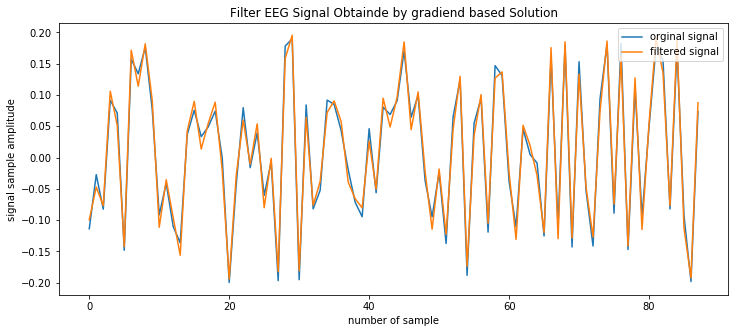

In [7]:
case ='3order'
if case=="3order":
    Filter_order=3
    N=100000                              #iteration number
    alpha=0.0005                          #learning rate 
    n=len(t)-2
    V=np.array([v[2:90],v[1:89],v[0:88]]) #input signal
    w=np.array([0,0,0])                   #inistail values of synaptic weight
    b=0                                   #inistail value of baised value 
    a=np.zeros(len(t)-2)                  #initisal value of adaline network output 
    T=t[2:90]                             #target signal
    e=T-a                                 #initial filtered  signal value
    for i in range(N):
        j=np.random.randint(1,n-1)        #random input index generation 
        J=np.concatenate((J,[j]))         #create a vector of index 
        w=w+2*alpha*e[j]*V[:,j]           #synaptic weight update based on gradient method
        a=np.transpose(w).dot(V)          #simulate or propagate the input to the output of Adaline
        e=T-a                             #calculate the error w.r.r target signal
    print(w)
    plt.figure(4,figsize=(12,5))
    plt.plot(S[2:90])
    plt.plot(e)
    plt.legend(('orginal signal','filtered signal'),loc='upper right')
    plt.title('Filter EEG Signal Obtainde by gradiend based Solution')
    plt.xlabel('number of sample')
    plt.ylabel('signal sample amplitude')
    plt.show()  


# Filter Design: ADALINE Design based using KERAS
6. The optimal solution is obtained by minimizing least mean square(LMS) between the unfiltered signal $T(k)$ considered as target signal and the output of ADALINE network. 

 KERAS allow to define optimization algorithms and paremetters

**we build our model with keras neural network one linear layer**

In [8]:
#filter design 
input_NN =V.T #input signal
target_NN = T #target signal
model = models.Sequential()
# Define the model of Neural Network for ADALINE: one hidden layer with one linear neuron
model.add(layers.Dense(1,activation='linear', input_shape =(Filter_order,)))
model.compile(optimizer= optimizers.RMSprop(lr=0.001),loss='mse', metrics=['accuracy'])
history = model.fit(input_NN, target_NN, batch_size=4, epochs =100, verbose =0, validation_data=(input_NN, target_NN))

 # Simulate ADALINE
 - obtain the synaptic weights from network model via **model.get_weights()** and propagate the input signal to the ADALINE output **$a(t)$** using the mathematical expression: $a(k)=w_{11}v(k)+w_{12}v(k-1)$ or  $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$ corresponding to second or third order ADALINE flter. 
 
 **we simulate adaline with the model**

[[-0.54546326]
 [-0.6064169 ]
 [-0.5073913 ]]


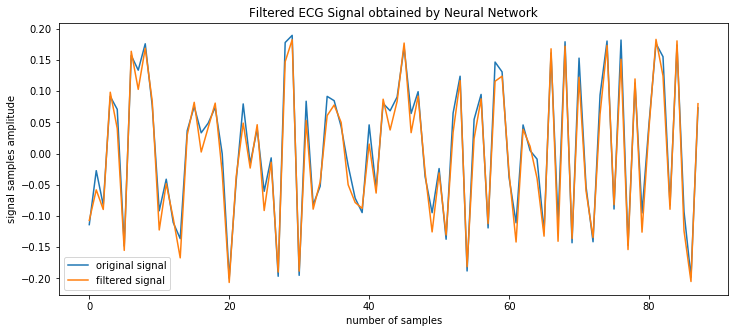

In [9]:
ww=model.get_weights()
w_w=np.array(ww[0])              #syntatetic weight value
print(w_w)
w_b=np.array(ww[1])              #baised value 
a_nn=np.dot(input_NN,w_w)+w_b    #simulation
s_nn=(T-a_nn.T)                  #filtered signal
plt.figure(5,figsize=(12,5))
plt.plot(S[2:90])#if third order used S[2:90]
plt.plot(s_nn.T)
plt.legend(('original signal','filtered signal'),loc='lower left')
plt.title('Filtered ECG Signal obtained by Neural Network')
plt.xlabel('number of samples')
plt.ylabel('signal samples amplitude')
plt.show() 

propagate the input signal using  KERAS command **model.predict(input_NN)** in order to obtain the ADALINE output **$a(t)$**

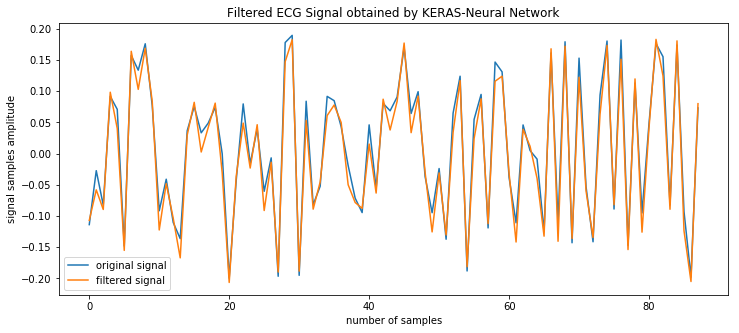

In [10]:
output_test= model.predict(input_NN)
TT=np.array([target_NN]).T
Sf_NN= TT-output_test
So= np.array([S[2:90]]) # if we use third order it should shift to S[2:90]
plt.figure(6,figsize=(12,5))
plt.plot(So.T)
plt.plot(Sf_NN)
plt.legend(('original signal','filtered signal'),loc='lower left')
plt.title('Filtered ECG Signal obtained by KERAS-Neural Network')
plt.xlabel('number of samples')
plt.ylabel('signal samples amplitude')
plt.show() 

**Conclusion**

weight in third order vs adaline neural network 

NN adaline   [-0.54546326 -0.6064169 -0.5073913 ]

Third order  [ 0.00814258 -0.05496158  0.04681899]

As a result we could see Neural network Adaline optimise the weight values.